# Case Study 4 : Data Science in Email Data

**Required Readings:** 
* [Enron Emails](https://www.kaggle.com/wcukierski/enron-email-dataset) 
* Please download the Enron Email dataset from [here](https://www.cs.cmu.edu/~./enron/).
* [TED Talks](https://www.ted.com/talks) for examples of 10 minutes talks.


** NOTE **
* Please don't forget to save the notebook frequently when working in Jupyter Notebook, otherwise the changes you made can be lost.

*----------------------

# Problem: pick a data science problem that you plan to solve using Email Data
* The problem should be important and interesting, which has a potential impact in some area.
* The problem should be solvable using the data and data science solutions.

Please briefly describe in the following cell: what problem are you trying to solve? why this problem is important and interesting?

Is it possible to use email sentiment to predict the downfall of a company?

# Data Collection/Processing: 

In [28]:
#----------------------------------------------
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

# read csv
import csv
import numpy as np

csv.field_size_limit(1000000000)
csvFile = open("emails.csv", "r")
# file downloaded from kaggle
reader = csv.reader(csvFile)

print "read csv complete\n", reader

read csv complete


In [29]:
# get all the sender, receiver, date, and content info from "inbox"

ct = 0
inbox_contact = []
inbox_date_content = []

for item in reader:
    if ct == 0:
        ct += 1
        continue
#     if "sent_mail" in item[0] or "sent_item" in item[0]:
    if "inbox" in item[0]:
        if ct < 100000:
#             print(item[0])
            item_split = item[1].split("\n")
#             if ct < 15:
#                 print item_split
            date_flag = False
            subitem_ct = 0
            for subitem in item_split:
                if "X-From:" in subitem:
                    sender = subitem.split(": ")
                    sender_name = sender[1]
                    if sender_name.find("<") != -1:
                        sender_name = sender_name[:sender_name.find("<")-1]
#                     if "," in sender_name:
#                         temp = sender_name.split(", ")
#                         sender_name = temp[1] + " " + temp[0]
#                     print "Sender:" + sender_name
                    
                if "X-To:" in subitem:
                    receivers_info = subitem.split(": ")
#                 print receivers
                    if len(receivers_info) > 1:
                        receivers = receivers_info[1].split(", ")
                    else:
                        break
                    for receiver in receivers:
#                         print receiver
                        inbox_contact.append([sender_name, receiver])
#                         print [sender_name, receiver]
#                     print receivers
                
                if "Date:" in subitem and date_flag == False:
                    date_flag = True
                    dateitem = subitem.split(": ")
                    date = dateitem[1].split(",")
                    date_str = date[1]
                    date_str_short = date_str[1:12]
#                     print date_str_short

                if "X-FileName" in subitem:
#                     print subitem_ct
                    content = ""
                    for seg in item_split[subitem_ct+1:]:
                        content += seg + " "
#                     print content + "\n"
                    
                    inbox_date_content.append([date_str_short, content])
                subitem_ct += 1
            ct += 1
        else:
            break

inbox_contact = np.asmatrix(inbox_contact)
print "Have read", ct, "inbox logs\n"
print "First 10 contacts in inbox data:\n", inbox_contact[:10]
print "\n"
print "First 10 time and content in inbox data:\n", inbox_date_content[:10]

Have read 81645 inbox logs

First 10 contacts in inbox data:
[['Dunton, Heather' 'Allen']
 ['Dunton, Heather' 'Phillip K. </O=ENRON/OU=NA/CN=RECIPIENTS/CN=Pallen>']
 ['"AnchorDesk"' 'pallen@ENRON.COM']
 ['subscriptions@intelligencepress.com@ENRON' 'pallen@enron.com']
 ['Prize Machin' 'pallen@enron.com']
 ['Kitchen, Louise' 'Colwell']
 ['Kitchen, Louise' 'Wes </O=ENRON/OU=NA/CN=RECIPIENTS/CN=WCOLWEL>']
 ['Kitchen, Louise' 'Hodges']
 ['Kitchen, Louise'
  'Georgeanne </O=ENRON/OU=NA/CN=RECIPIENTS/CN=Ghodges>']
 ['Kitchen, Louise' 'Milnthorp']]


First 10 time and content in inbox data:
[['7 Dec 2001 ', '   Please let me know if you still need Curve Shift.  Thanks, Heather  -----Original Message----- From: \tAllen, Phillip K.   Sent:\tFriday, December 07, 2001 5:14 AM To:\tDunton, Heather Subject:\tRE: West Position  Heather,  Did you attach the file to this email?   -----Original Message----- From: \tDunton, Heather   Sent:\tWednesday, December 05, 2001 1:43 PM To:\tAllen, Phillip K.; Bel

In [27]:
# get all the sender, receiver, date, and content info from "sent_mail" and "sent_item"

ct = 0
sent_contact = []
sent_date_content = []

for item in reader:
    if ct == 0:
        ct += 1
        continue
    if "sent_mail" in item[0] or "sent_item" in item[0]:
#     if "inbox" in item[0]:
        if ct < 100000:
#             print(item[0])
            item_split = item[1].split("\n")
#             if ct < 15:
#                 print item_split
            date_flag = False
            subitem_ct = 0
            for subitem in item_split:
                if "X-From:" in subitem:
                    sender = subitem.split(": ")
                    sender_name = sender[1]
                    if sender_name.find("<") != -1:
                        sender_name = sender_name[:sender_name.find("<")-1]
                    if "," in sender_name:
                        temp = sender_name.split(", ")
                        sender_name = temp[1] + " " + temp[0]
#                     print "Sender:" + sender_name
                    
                if "X-To:" in subitem:
                    receivers_info = subitem.split(": ")
#                 print receivers
                    if len(receivers_info) > 1:
                        receivers = receivers_info[1].split(", ")
                    else:
                        break
                    for receiver in receivers:
#                         print receiver
                        sent_contact.append([sender_name, receiver])
#                         print [sender_name, receiver]
#                     print receivers
                
                if "Date:" in subitem and date_flag == False:
                    date_flag = True
                    dateitem = subitem.split(": ")
                    date = dateitem[1].split(",")
                    date_str = date[1]
                    date_str_short = date_str[1:12]
#                     print date_str_short

                if "X-FileName" in subitem:
#                     print subitem_ct
                    content = ""
                    for seg in item_split[subitem_ct+1:]:
                        content += seg + " "
#                     print content + "\n"
                    
                    sent_date_content.append([date_str_short, content])
                subitem_ct += 1
            ct += 1
        else:
            break

sent_contact = np.asmatrix(sent_contact)
print "Have read", ct, "sent mail logs\n"
print "First 10 contacts in sent mail:\n", sent_contact[:10]
print "\n"
print "First 10 time and content in sent mail:\n", sent_date_content[:10]

Have read 68157 sent mail logs

First 10 contacts in sent mail:
[['Phillip K Allen' 'Leah Van Arsdall']
 ['Phillip K Allen' 'Randall L Gay']
 ['Phillip K Allen' 'Greg Piper']
 ['Phillip K Allen' 'Greg Piper']
 ['Phillip K Allen' 'david.l.johnson@enron.com']
 ['Phillip K Allen' 'John Shafer']
 ['Phillip K Allen' 'Joyce Teixeira']
 ['Phillip K Allen' 'Mark Scott']
 ['Phillip K Allen' 'zimam@enron.com']
 ['Phillip K Allen' '"Buckner']]


First 10 time and content in sent mail:
[['18 Oct 2000', ' test successful.  way to go!!! '], ['23 Oct 2000', ' Randy,   Can you send me a schedule of the salary and level of everyone in the  scheduling group.  Plus your thoughts on any changes that need to be made.   (Patti S for example)  Phillip '], ['31 Aug 2000', " Let's shoot for Tuesday at 11:45.   "], ['31 Aug 2000', ' Greg,   How about either next Tuesday or Thursday?  Phillip '], ['22 Aug 2000', ' Please cc the following distribution list with updates:  Phillip Allen (pallen@enron.com) Mike Grig

In [21]:
num_sent_dict = {}

for item in contact:
    if item[0, 0] not in num_sent_dict.keys():
        num_sent_dict[item[0, 0]] = 1
    else:
        num_sent_dict[item[0, 0]] = num_sent_dict[item[0, 0]] + 1
        
print num_sent_dict

{'Dawn Olson-Wallerus': 1, 'Mark Elliott': 17, 'JHDUNCAN@aol.com@ENRON': 2, 'Miller, Don (Asset Mktg)': 670, 'Migden, Janine': 98, '"Giannetti, Joanne"': 1, 'BradyKW@aol.com': 6, 'Wright, Alan': 1, '"Griffin, Jim (HOU)"': 1, '"Birgit D.Kamps"': 2, 'Weldon, V Charles': 2, 'Hinze, Ryan': 8, 'JHDUNCAN@aol.com': 4, 'Wiggs, Brett': 8, 'Network Commerce': 7, 'Schoene, Benjamin': 6, 'Brown, Sharon': 1784, '"Walker, Bruce J."': 6, 'Westphal, Jeffrey': 1, '"Carrie, Mark"': 1, 'K. Bass': 29, '"Thomas Hetherington"': 2, 'Marcus Jones': 33, '"Your Online Account"': 2, 'Sandy Thao': 1, 'ghkim@sk-enron.com@ENRON': 3, "Pat O'Hara": 1, 'michael_yevak@notes.teradyne.com': 1, '"Fenner, Chet"': 31, 'Harrington, Stephen': 4, 'Musch, Susan': 28, 'Patrice L Mims': 4, 'Nachawati, Majed': 2, 'Wesner-Soong, Sarah': 62, '<Carol_Benter@mckinsey.com': 1, 'Henley, Gaynel': 7, 'Pocta, Robert M.': 2, 'Brian Redmond': 48, 'Ed Quinn': 3, '"Scottie McKeogh"': 2, '"Joe Wright"': 2, '"Brian Hoskins"': 81, 'Goughary, Jim'

# Data Exploration: Exploring the Email Dataset

** plot email communication graph/network** 
* each node is an email account
* the weight of an edge between two accounts depends on how many emails have been sent between them.

In [30]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

# function to plot the first X contacts

import networkx as nx

def draw_netplot(contacts_num, contact):
    g = nx.Graph()
    g.clear()

    sender_list = []
    sender_temp = ""
    w = {}

    for contact_i in range(contacts_num + 1):
        if contact[contact_i, 0] not in sender_list:
            g.add_node(contact[contact_i, 0])
            sender_list.append(contact[contact_i, 0])
        sender_temp = contact[contact_i, 0]
        receiver_temp = contact[contact_i, 1]
    #     print receiver_temp
        if sender_temp + receiver_temp in w.keys():
            weight = w[sender_temp + receiver_temp]
            w[sender_temp + receiver_temp] = weight + 1
    #         print w[receiver_temp]
        else:
            w[sender_temp + receiver_temp] = 1
            g.add_node(receiver_temp)
    #     print [sender_temp, receiver_temp]
    #     print sender_temp,receiver_temp, w[sender_temp + receiver_temp]
        g.add_edge(sender_temp, receiver_temp, weight = w[sender_temp + receiver_temp])

    # g.nodes()
    print "Have read", contact_i, "contacts."
    
    return g, contact_i

Have read 1000 contacts.


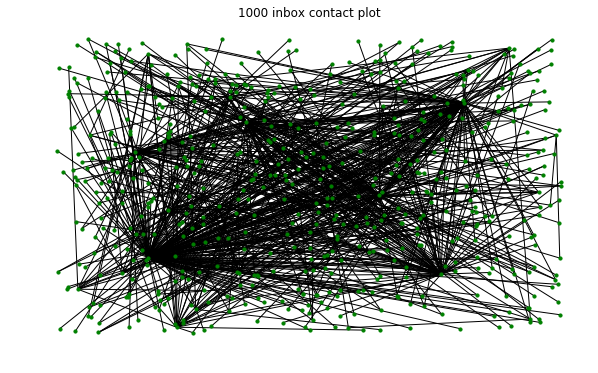

Have read 3000 contacts.


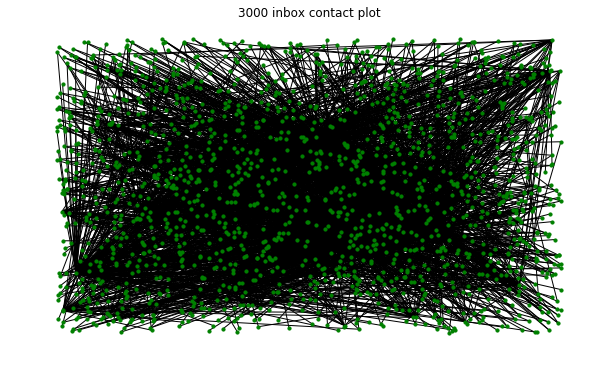

Have read 5000 contacts.


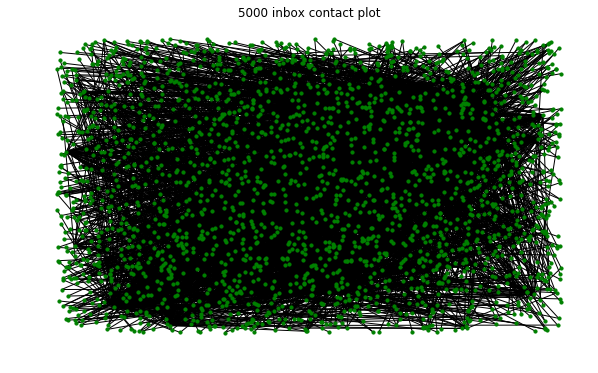

Have read 1000 contacts.


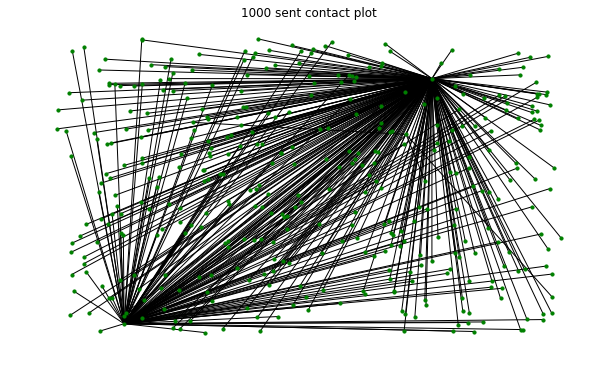

Have read 3000 contacts.


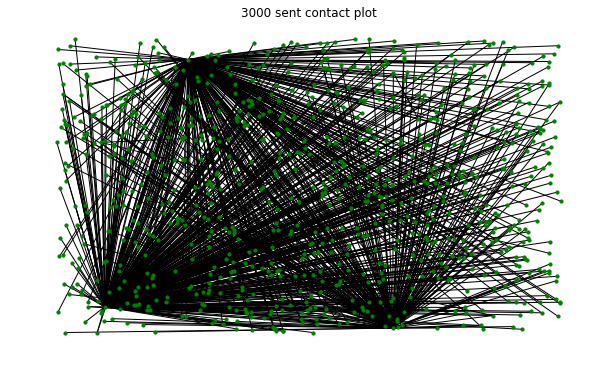

Have read 5000 contacts.


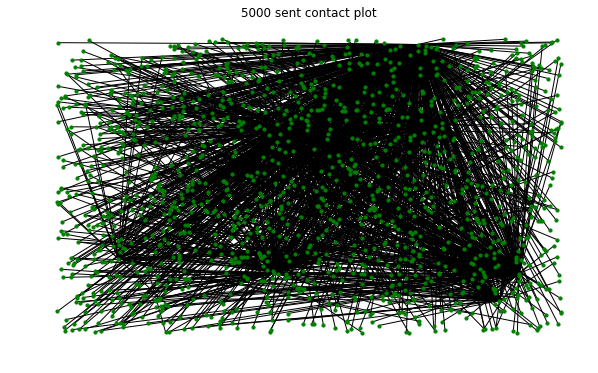

In [33]:
import matplotlib.pyplot as plt

resource = inbox_contact

f, ax= plt.subplots(figsize = (10, 6))
g, contact_i = draw_netplot(1000, resource)
nx.draw_random(g, node_color = 'g',node_size =10)
title = str(contact_i) + " inbox contact plot"
plt.title(title)
filename = title + ".png"
plt.savefig(filename, dpi = 500)
plt.show(nx)

f, ax= plt.subplots(figsize = (10, 6))
g, contact_i = draw_netplot(3000, resource)
nx.draw_random(g, node_color = 'g',node_size =10)
title = str(contact_i) + " inbox contact plot"
plt.title(title)
filename = title + ".png"
plt.savefig(filename, dpi = 500)
plt.show(nx)

f, ax= plt.subplots(figsize = (10, 6))
g, contact_i = draw_netplot(5000,resource)
nx.draw_random(g, node_color = 'g',node_size =10)
title = str(contact_i) + " inbox contact plot"
plt.title(title)
filename = title + ".png"
plt.savefig(filename, dpi = 500)
plt.show(nx)

resource = sent_contact

f, ax= plt.subplots(figsize = (10, 6))
g, contact_i = draw_netplot(1000, resource)
nx.draw_random(g, node_color = 'g',node_size =10)
title = str(contact_i) + " sent contact plot"
plt.title(title)
filename = title + ".png"
plt.savefig(filename, dpi = 500)
plt.show(nx)

f, ax= plt.subplots(figsize = (10, 6))
g, contact_i = draw_netplot(3000, resource)
nx.draw_random(g, node_color = 'g',node_size =10)
title = str(contact_i) + " sent contact plot"
plt.title(title)
filename = title + ".png"
plt.savefig(filename, dpi = 500)
plt.show(nx)

f, ax= plt.subplots(figsize = (10, 6))
g, contact_i = draw_netplot(5000,resource)
nx.draw_random(g, node_color = 'g',node_size =10)
title = str(contact_i) + " sent contact plot"
plt.title(title)
filename = title + ".png"
plt.savefig(filename, dpi = 500)
plt.show(nx)

# The Solution: implement a data science solution to the problem you are trying to solve.

Briefly describe the idea of your solution to the problem in the following cell:

Linked the average sentiment score and the month time series to see the relationship between sentiment and time

Write codes to implement the solution in python:

In [37]:
# function to translate the date type("Jan XXXX") to "XXXX.01"
def trsnsfer_date_to_float_model(date_mmyy):
    month = date_mmyy[:3]
    year = date_mmyy[-4:]
    if month == "Jan":
        month_yr = '{:.2f}'.format(float(year) + 0.01)
    elif month == "Feb":
        month_yr = '{:.2f}'.format(float(year) + 0.02)
    elif month == "Mar":
        month_yr = '{:.2f}'.format(float(year) + 0.03)
    elif month == "Apr":
        month_yr = '{:.2f}'.format(float(year) + 0.04)
    elif month == "May":
        month_yr = '{:.2f}'.format(float(year) + 0.05)
    elif month == "Jun":
        month_yr = '{:.2f}'.format(float(year) + 0.06)
    elif month == "Jul":
        month_yr = '{:.2f}'.format(float(year) + 0.07)
    elif month == "Aug":
        month_yr = '{:.2f}'.format(float(year) + 0.08)
    elif month == "Sep":
        month_yr = '{:.2f}'.format(float(year) + 0.09)
    elif month == "Oct":
        month_yr = '{:.2f}'.format(float(year) + 0.10)
    elif month == "Nov":
        month_yr = '{:.2f}'.format(float(year) + 0.11)
    elif month == "Dec":
        month_yr = '{:.2f}'.format(float(year) + 0.12)
    else:
        return -1
    
    return month_yr

In [50]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

from textblob import TextBlob

# link the date and sentiment information of inbox
# dictionary {date_mmyy | [sentiment_sum, data_count]}
inbox_date_sentiment_dict = {}

for logitem in range(len(inbox_date_content)):
    detail = inbox_date_content[logitem]
#     print detail[0]
#     print detail[1]
    date = detail[0]
    date_mmyy = date[date.find(" ") + 1:]
    if float(date_mmyy[-4:]) < 1997 or float(date_mmyy[-4:]) > 2004:
        continue
    date_mmyy = trsnsfer_date_to_float_model(date_mmyy.strip(" "))
    blob = TextBlob(detail[1])
    sentiment = blob.sentiment
#     print date[date.find(" ") + 1:]
    if date_mmyy not in inbox_date_sentiment_dict.keys():
        inbox_date_sentiment_dict[date_mmyy] = [blob.sentiment[0], 1]
    else:
        current_month_info = inbox_date_sentiment_dict[date_mmyy]
        current_sentiment_sum = current_month_info[0] + blob.sentiment[0]
        current_data_count = current_month_info[1] + 1
#         print [current_sentiment_sum, current_data_count]
        inbox_date_sentiment_dict[date_mmyy] = [current_sentiment_sum, current_data_count]
#     print date_sentiment_dict
print "Has recorded", logitem, "inbox date and sentiment information."

Has recorded 81643 inbox date and sentiment information.


In [53]:
# link the date and sentiment information of sent mail and sent item
# dictionary {date_mmyy | [sentiment_sum, data_count]}
sent_date_sentiment_dict = {}

for logitem in range(len(sent_date_content)):
    detail = sent_date_content[logitem]
#     print detail[0]
#     print detail[1]
    date = detail[0]
    date_mmyy = date[date.find(" ") + 1:]
    if float(date_mmyy[-4:]) < 1997 or float(date_mmyy[-4:]) > 2004:
        continue
    date_mmyy = trsnsfer_date_to_float_model(date_mmyy.strip(" "))
    blob = TextBlob(detail[1])
    sentiment = blob.sentiment
#     print date[date.find(" ") + 1:]
    if date_mmyy not in sent_date_sentiment_dict.keys():
        sent_date_sentiment_dict[date_mmyy] = [blob.sentiment[0], 1]
    else:
        current_month_info = sent_date_sentiment_dict[date_mmyy]
        current_sentiment_sum = current_month_info[0] + blob.sentiment[0]
        current_data_count = current_month_info[1] + 1
#         print [current_sentiment_sum, current_data_count]
        sent_date_sentiment_dict[date_mmyy] = [current_sentiment_sum, current_data_count]
#     print date_sentiment_dict
print "Has recorded", logitem, "sent mail and sent item date and sentiment information."

Has recorded 68155 sent mail and sent item date and sentiment information.


In [59]:
# sort month info and calculate average sentiment score of each month
def sort_date_sentiment(date_sentiment_dict):
    date = []
    avg_sentiment = []
    mail_count = []

    date = sorted(date_sentiment_dict.keys())
    for date_detail in date:
        sentiment_sum_num = date_sentiment_dict[date_detail]
#     avg_sentiment.append(sentiment_sum_num[1])
        avg_sentiment.append(sentiment_sum_num[0]/sentiment_sum_num[1])
        mail_count.append(sentiment_sum_num[1])
# print avg_sentiment
    
    print "date list: ", date
    print "Average sentiment list:", avg_sentiment
    print "Mail count list:", mail_count, "\n"
    return date, avg_sentiment, mail_count

In [60]:
print "Inbox date list, average sentiment list and sent item number list:"
inbox_date_list, inbox_avg_sentiment_list, inbox_mail_count = sort_date_sentiment(inbox_date_sentiment_dict)
print "Sent mail and sent item date list, average sentiment list and sent item number list:"
sent_date_list, sent_avg_sentiment_list, sent_mail_count = sort_date_sentiment(sent_date_sentiment_dict)

Inbox date list, average sentiment list and sent item number list:
date list:  ['2000.01', '2000.02', '2000.03', '2000.04', '2000.05', '2000.06', '2000.07', '2000.08', '2000.09', '2000.10', '2000.11', '2000.12', '2001.01', '2001.02', '2001.03', '2001.04', '2001.05', '2001.06', '2001.07', '2001.08', '2001.09', '2001.10', '2001.11', '2001.12', '2002.01', '2002.02', '2002.03', '2002.04', '2002.05', '2002.06', '2002.07', '2002.12']
Average sentiment list: [0.08572456545020456, 0.10419870036358778, 0.10559487777367514, 0.09677065796327469, 0.08728690083503932, 0.08848256815790792, 0.0674289073605376, 0.08399608547612229, 0.08381948706984767, 0.08125685225597898, 0.10400388163642271, 0.11351336403694903, 0.0948919347084852, 0.07823007600796412, 0.07598846200977545, 0.03204598842462138, 0.09894897766327178, 0.09186341604039219, 0.09754700383566234, 0.11316709332719843, 0.11029772007996762, 0.09512153922001798, 0.11937885218765948, 0.12562517679544247, 0.0997879902323714, 0.1145300466226957, 0

# Results: summarize and visualize the results discovered from the analysis

Please use figures, tables, or videos to communicate the results with the audience.


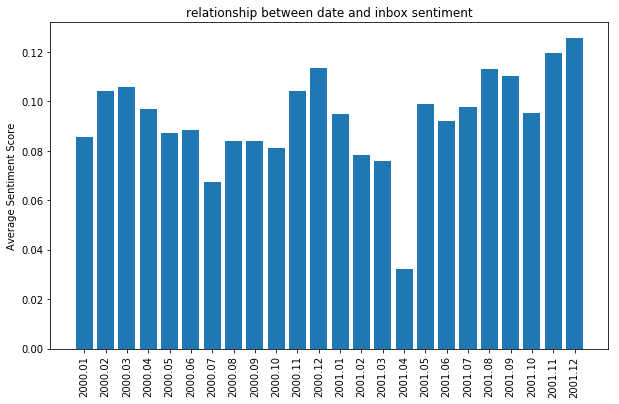

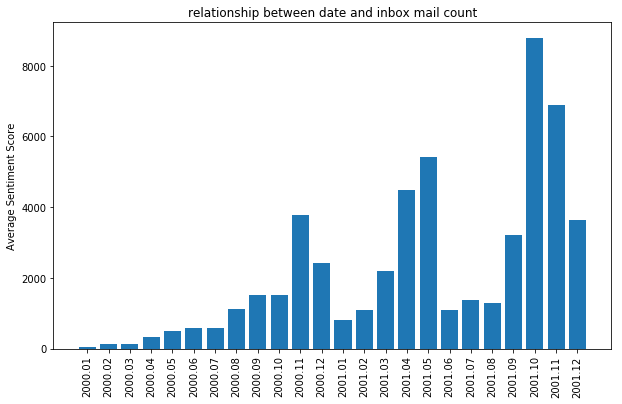

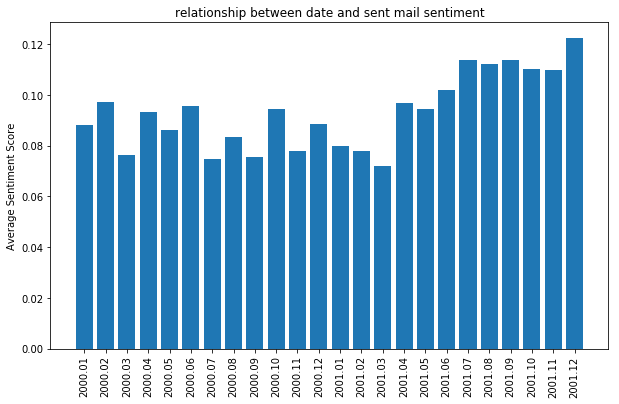

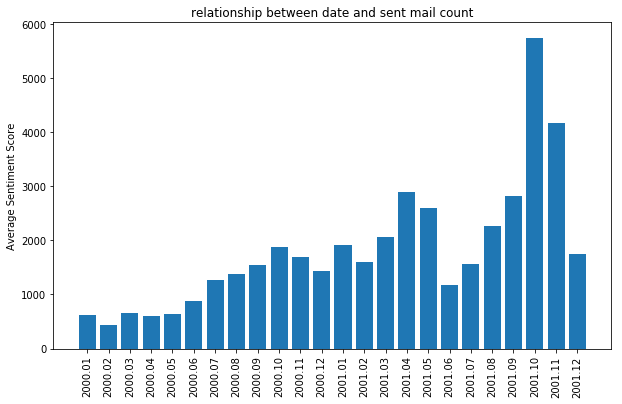

In [68]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

# plot sentiment acore and month

import matplotlib.pyplot as plt
from matplotlib.axes import Axes

# inbox sentiment and date relation
f, ax= plt.subplots(figsize = (10, 6))
ax.set_title("relationship between date and inbox sentiment")
plt.bar(range(24), inbox_avg_sentiment_list[:24], tick_label=inbox_date_list[:24])
labels = ax.get_xticklabels()
plt.setp(labels, rotation=90)
plt.ylabel("Average Sentiment Score")
plt.savefig("relationship between date and inbox sentiment", dpi = 500)
plt.show()

# inbox mail count and date relation
f, ax= plt.subplots(figsize = (10, 6))
ax.set_title("relationship between date and inbox mail count")
plt.bar(range(24), inbox_mail_count[:24], tick_label=inbox_date_list[:24])
labels = ax.get_xticklabels()
plt.setp(labels, rotation=90)
plt.ylabel("Average Sentiment Score")
plt.savefig("relationship between date and inbox mail count", dpi = 500)
plt.show()

# sent mail sentiment and date relation
f, ax= plt.subplots(figsize = (10, 6))
ax.set_title("relationship between date and sent mail sentiment")
plt.bar(range(24), sent_avg_sentiment_list[1:25], tick_label=sent_date_list[1:25])
labels = ax.get_xticklabels()
plt.setp(labels, rotation=90)
plt.ylabel("Average Sentiment Score")
plt.savefig("relationship between date and sent mail sentiment", dpi = 500)
plt.show()

# sent mail count and date relation
f, ax= plt.subplots(figsize = (10, 6))
ax.set_title("relationship between date and sent mail count")
plt.bar(range(24), sent_mail_count[1:25], tick_label=sent_date_list[1:25])
labels = ax.get_xticklabels()
plt.setp(labels, rotation=90)
plt.ylabel("Average Sentiment Score")
plt.savefig("relationship between date and sent mail count", dpi = 500)
plt.show()

*-----------------
# Done

All set! 

** What do you need to submit?**

* **Notebook File**: Save this Jupyter notebook, and find the notebook file in your folder (for example, "filename.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook. If you used "jupyter notebook --pylab=inline" to open the notebook, all the figures and tables should have shown up in the notebook.

* **PPT Slides**: please prepare PPT slides (for 10 minutes' talk) to present about the case study . Each team present their case studies in class for 10 minutes.

Please compress all the files in a zipped file.


** How to submit: **

        Please submit through Canvas, in the Assignment "Case Study 5".
        
** Note: Each team only needs to submit one submission in Canvas **


# Peer-Review Grading Template:

** Total Points: (100 points) ** Please don't worry about the absolute scores, we will rescale the final grading according to the performance of all teams in the class.

Please add an "**X**" mark in front of your rating: 

For example:

*2: bad*
          
**X** *3: good*
    
*4: perfect*


    ---------------------------------
    The Problem: 
    ---------------------------------
    
    1. (10 points) how well did the team describe the problem they are trying to solve using the data? 
       0: not clear
       2: I can barely understand the problem
       4: okay, can be improved
       6: good, but can be improved
       8: very good
       10: crystal clear
    
    2. (10 points) do you think the problem is important or has a potential impact?
        0: not important at all
        2: not sure if it is important
        4: seems important, but not clear
        6: interesting problem
        8: an important problem, which I want to know the answer myself
       10: very important, I would be happy invest money on a project like this.
    
    ----------------------------------
    Data Collection and Processing:
    ----------------------------------
    
    3. (10 points) Do you think the data collected/processed are relevant and sufficient for solving the above problem? 
       0: not clear
       2: I can barely understand what data they are trying to collect/process
       4: I can barely understand why the data is relevant to the problem
       6: the data are relevant to the problem, but better data can be collected
       8: the data collected are relevant and at a proper scale
      10: the data are properly collected and they are sufficient

    -----------------------------------
    Data Exploration:
    -----------------------------------
    4. How well did the team solve the following task:
    
    (1) plot email communication graph/network (10 points):
       0: missing answer
       4: okay, but with major problems
       7: good, but with minor problems
      10: perfect
    

    -----------------------------------
    The Solution
    -----------------------------------
    5.  how well did the team describe the solution they used to solve the problem? (10 points)
       0: not clear
       2: I can barely understand
       4: okay, can be improved
       6: good, but can be improved
       8: very good
       10: crystal clear
       
    6. how well is the solution in solving the problem? (10 points)
       0: not relevant
       2: barely relevant to the problem
       4: okay solution, but there is an easier solution.
       6: good, but can be improved
       8: very good, but solution is simple/old
       10: innovative and technically sound
       
    7. how well did the team implement the solution in python? (10 points)
       0: the code is not relevant to the solution proposed
       2: the code is barely understandable, but not relevant
       4: okay, the code is clear but incorrect
       6: good, the code is correct, but with major errors
       8: very good, the code is correct, but with minor errors
      10: perfect 
   
    -----------------------------------
    The Results
    -----------------------------------
     8.  How well did the team present the results they found in the data? (10 points)
       0: not clear
       2: I can barely understand
       4: okay, can be improved
       6: good, but can be improved
       8: very good
      10: crystal clear
       
     9.  How do you think of the results they found in the data?  (5 points)
       0: not clear
       1: likely to be wrong
       2: okay, maybe wrong
       3: good, but can be improved
       4: make sense, but not interesting
       5: make sense and very interesting
     
    -----------------------------------
    The Presentation
    -----------------------------------
    10. How all the different parts (data, problem, solution, result) fit together as a coherent story?  
       0: they are irrelevant
       1: I can barely understand how they are related to each other
       2: okay, the problem is good, but the solution doesn't match well, or the problem is not solvable.
       3: good, but the results don't make much sense in the context
       4: very good fit, but not exciting (the storyline can be improved/polished)
       5: a perfect story
      
    11. Did the presenter make good use of the 10 minutes for presentation?  
       0: the team didn't present
       1: bad, barely finished a small part of the talk
       2: okay, barely finished most parts of the talk.
       3: good, finished all parts of the talk, but some part is rushed
       4: very good, but the allocation of time on different parts can be improved.
       5: perfect timing and good use of time      

    12. How well do you think of the presentation (overall quality)?  
       0: the team didn't present
       1: bad
       2: okay
       3: good
       4: very good
       5: perfect


    -----------------------------------
    Overall: 
    -----------------------------------
    13. How many points out of the 100 do you give to this project in total?  Please don't worry about the absolute scores, we will rescale the final grading according to the performance of all teams in the class.
    Total score:
    
    14. What are the strengths of this project? Briefly, list up to 3 strengths.
       1: 
       2:
       3:
    
    15. What are the weaknesses of this project? Briefly, list up to 3 weaknesses.
       1:
       2:
       3:
    
    16. Detailed comments and suggestions. What suggestions do you have for this project to improve its quality further.
    
    
    

    ---------------------------------
    Your Vote: 
    ---------------------------------
    1. [Overall Quality] Between the two submissions that you are reviewing, which team would you vote for a better score?  (5 bonus points)
        0: I vote the other team is better than this team
        5: I vote this team is better than the other team 
        
    2. [Presentation] Among all the teams in the presentation, which team do you think deserves the best presentation award for this case study?  
        1: Team 1
        2: Team 2
        3: Team 3
        4: Team 4
        5: Team 5
        6: Team 6
        7: Team 7
        8: Team 8
        9: Team 9


